In [1]:
# Rename file "overload_calc_min_v02b.ipybn" 
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
from utils.values_tools import *
from utils.add_tools import *
from utils.variables import container_sections

%matplotlib inline

In [2]:
# ================== Y1-data ==================
data_Y1 = pd.ExcelFile("distributions_data.xlsx").parse("Y1")
X1 = data_Y1["X"].to_numpy()
pos_Y1 = data_Y1["pos_Y1"].to_numpy()
pos_Y1 = interp1d(X1, pos_Y1, fill_value="extrapolate")
neg_Y1 = data_Y1["neg_Y1"].to_numpy()
neg_Y1 = interp1d(X1, neg_Y1, fill_value="extrapolate")


# ================== Y2-data ==================
data_Y2 = pd.ExcelFile("distributions_data.xlsx").parse("Y2")
val_pos_Y2 = data_Y2["pos_Y2"][0] #.to_numpy()
val_neg_Y2 = data_Y2["neg_Y2"][0] #.to_numpy()
pos_Y2 = lambda x: val_pos_Y2 if isinstance(x, float) or isinstance(x, int) else len(x)*[val_pos_Y2]
neg_Y2 = lambda x: val_neg_Y2 if isinstance(x, float) or isinstance(x, int) else len(x)*[val_neg_Y2]


# ================== Y3-data ==================
data_Y3 = pd.ExcelFile("distributions_data.xlsx").parse("Y3")
X3 = data_Y3["X"].to_numpy()
neg_Y3 = data_Y3["neg_Y3"].to_numpy()
neg_Y3 = interp1d(X3, neg_Y3, fill_value="extrapolate")


# ================ Sections data ===================
sections = pd.ExcelFile("sections_data.xlsx").parse('sections').to_numpy()
parameters = {}

# ================ Save to Excel ================
# writer = pd.ExcelWriter('out_values.xlsx', engine='xlsxwriter')
# df.to_excel(writer, 'ny')
# writer.save()

## Testing for near to full domain X

case:  neg_Y1
max_val =  108.47775700934596
length_max =  10.981308411214956 [mm]


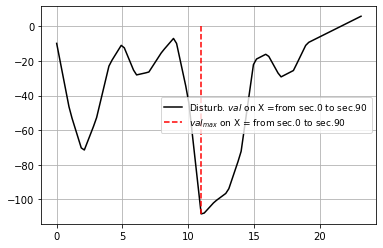

In [3]:
# ===================== TEST =====================
#X = sections[-19:-17, 1].astype(float)
names = sections[0:-17, 0].astype(str)

case, max_val, X_max, ax_all, fig_all, \
case_min, min_val, X_min = model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=names, sections=sections) #X = X

print("case: ", case)
print("max_val = ", max_val)
print("length_max = ", X_max, "[mm]")
fig_all

# Part II
## Find maximum on some domain X
**Input:**  
- list of sections-name with some domain X (list_sections)
  
**Output (for every domain X):**  
- max_val (functions-max-value for the place) (max_vals)
- names of cases with max_val (cases)
- value of X with the max_val (X_max_list)
- name of the section where found max_val (sections_name)
- figures with the place (figs)
- minimun value for the place (another extremum) (min_val)
- names of cases with min_val (case_min)
- value of X with the min_val (X_val)

## General part - DataFrame with whole data

In [4]:
list_sections = container_sections.list_sections
# print(list_sections[-1])
# len(list_sections)

# =============== Get data for df ===============
cases, \
max_vals, \
X_max_list, \
sections_name, \
figs, \
case_min, \
min_val, \
X_min = list_values(functions = {"pos_Y1": pos_Y1, 
                                 "neg_Y1": neg_Y1, 
                                 "neg_Y3": neg_Y3}, 
                      name=list_sections, sections=sections)


# ===== Get DataFrame with whole information =====
df = name_val(sections_name, max_vals, 
              X_max_list=X_max_list, cases=cases)
df

,Names,Values,X,Cases
0,"0, 1",19.345794,0.233645,neg_Y3
1,"1, 2",28.691589,0.467290,neg_Y3
2,"5, 6, 7",65.887850,1.635514,neg_Y3
3,"9, 10",72.943925,2.102804,neg_Y3
4,"9, 10, 11, 12, 13, 14, 15, 16",72.943925,2.102804,neg_Y3
5,"12, 13",58.925234,2.803738,neg_Y3
6,"13, 14",53.616822,3.037383,neg_Y3
7,"14, 15",45.267757,3.271028,neg_Y1
8,"15, 16",37.826168,3.504673,neg_Y1
9,"17, 18, 19",22.942991,3.971963,neg_Y1


## Testing for one domain and one function on the domain

In [5]:
print(only_section(neg_Y3, sections, ["2", "10", "40"]))
print(only_section(neg_Y3, sections, ["9", "105"]))
print(only_section(neg_Y3, sections, ["1", "89"]))
print(only_section(neg_Y3, sections, ["55", "56"]))

[['2', '10', '40'], [-28.69158878504673, -68.27102803738318, -67.38317757009355]]
[['9', '105'], [-72.94392523364486, 112.16822429906478]]
[['1', '89'], [-19.345794392523366, 52.35514018691555]]
[['55', '56'], [-53.644859813083634, -43.130841121494825]]


## Testing for one section's name

In [6]:
# ============ TEST for one name =============
model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=["55"], sections=sections)

# ============ Check for TEST for one name =============
# print(only_section(neg_Y3, sections, ["2"]))

('neg_Y1',
 59.71588785046672,
 14.252336448598141,
 <scipy.interpolate.interpolate.interp1d at 0xa83ebd8>)

In [7]:
# ============ TEST for one name =============
model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=["56"], sections=sections)

# ============ Check for TEST for one name =============
# print(only_section(neg_Y3, sections, ["2"]))

('neg_Y1',
 47.17967289719566,
 14.485981308411226,
 <scipy.interpolate.interpolate.interp1d at 0xa83ebd8>)

## Get values and view plot on some place

case:  neg_Y1
max_val =  108.47775700934596
X_max =  10.981308411214956


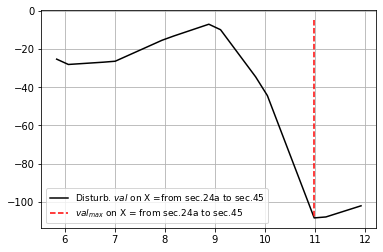

In [8]:
# ===================== TEST =====================
# X = sections[-19:-17, 1].astype(float)
names = sections[25:-65, 0].astype(str)

case_test, max_val_test, X_max_test, ax_test, fig_test, \
case_min_test, min_val_test, X_min_test = model(
    functions = {"pos_Y1": pos_Y1, 
                 "neg_Y1": neg_Y1, 
                 "neg_Y3": neg_Y3},
    name=names, sections=sections) # X = X

print("case: ", case_test)
print("max_val = ", max_val_test)
print("X_max = ", X_max_test)
fig_test

## View all functions on all domain X

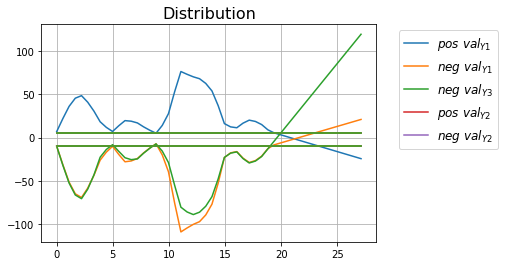

In [9]:
all_sections_plot(sections[-1, 1],
                  pos_Y1 = pos_Y1, 
                  neg_Y1 = neg_Y1,
                  pos_Y2 = pos_Y2,
                  neg_Y2 = neg_Y2,
                  neg_Y3 = neg_Y3)

## Optional blocks

In [10]:
# ================ Save to Excel ================
writer = pd.ExcelWriter('./output/out_values.xlsx', engine='xlsxwriter')
df.to_excel(writer, 'values')
writer.save()

In [11]:
# ===================== Save all figs =====================        
multipleSaveFigs(**figs)